In [1]:
import pandas as pd
import numpy as np
COLUMN_NAMES=['frame','track id','type','truncated','occluded','alpha','bbox_left','bbox_top','bbox_right','bbox_bottom','height','width','length','pos_x','pos_y','pos_z','rot_y']
df = pd.read_csv('/mnt/data/prog/Kitti/label_02/0000.txt',header = None, sep = ' ')
df.columns=COLUMN_NAMES
df.head()



frame  track id        type  truncated  occluded      alpha    bbox_left  \
0      0        -1    DontCare         -1        -1 -10.000000   219.310000   
1      0        -1    DontCare         -1        -1 -10.000000    47.560000   
2      0         0         Van          0         0  -1.793451   296.744956   
3      0         1     Cyclist          0         0  -1.936993   737.619499   
4      0         2  Pedestrian          0         0  -2.523309  1106.137292   

     bbox_top   bbox_right  bbox_bottom       height        width  \
0  188.490000   245.500000   218.560000 -1000.000000 -1000.000000   
1  195.280000   115.480000   221.480000 -1000.000000 -1000.000000   
2  161.752147   455.226042   292.372804     2.000000     1.823255   
3  161.531951   931.112229   374.000000     1.739063     0.824591   
4  166.576807  1204.470628   323.876144     1.714062     0.767881   

        length      pos_x     pos_y      pos_z     rot_y  
0 -1000.000000 -10.000000 -1.000000  -1.000000 -1.000000  
1 -1000.000000 -10.000000 -1.000000  -1.000000 -1.000000  
2     4.433886  -4.552284  1.858523  13.410495 -2.115488  
3     1.785241   1.640400  1.675660   5.776261 -1.675458  
4     0.972283   6.301919  1.652419   8.455685 -1.900245

In [2]:
df.loc[df.type.isin(['Truck','Van','Tram']),'type']='Car'
df=df[df.type.isin(['Car','Pedestrian','Cyclist'])]
df
 

frame  track id        type  truncated  occluded     alpha    bbox_left  \
2         0         0         Car          0         0 -1.793451   296.744956   
3         0         1     Cyclist          0         0 -1.936993   737.619499   
4         0         2  Pedestrian          0         0 -2.523309  1106.137292   
7         1         0         Car          0         0 -1.796862   294.898777   
8         1         1     Cyclist          0         0 -1.935205   745.017137   
9         1         2  Pedestrian          0         0 -2.530402  1138.342096   
12        2         0         Car          0         0 -1.800343   293.093560   
13        2         1     Cyclist          0         0 -1.933364   752.406083   
14        2         2  Pedestrian          0         0 -2.538744  1151.358043   
17        3         0         Car          0         0 -1.803889   291.328036   
18        3         1     Cyclist          0         0 -1.931469   759.786603   
19        3         2  Pedestrian          0         0 -2.547728  1154.836779   
22        4         0         Car          0         0 -1.808333   290.287584   
23        4         1     Cyclist          0         0 -1.929519   767.158958   
24        4         2  Pedestrian          1         0 -2.557045  1180.675035   
27        5         0         Car          0         0 -1.812818   289.271282   
28        5         1     Cyclist          0         0 -1.953750   766.121990   
29        5         2  Pedestrian          1         0 -2.567232  1208.535305   
30        5         3         Car          2         2  2.131494   371.255591   
33        6         0         Car          0         0 -1.811800   288.044118   
34        6         1     Cyclist          0         0 -1.977973   765.129111   
35        6         3         Car          2         2  2.133168   379.391627   
37        7         0         Car          0         0 -1.810839   286.853550   
38        7         1     Cyclist          0         0 -2.002189   764.180855   
39        7         3         Car          2         2  2.134688   387.603899   
41        8         0         Car          0         0 -1.809933   285.694115   
42        8         1     Cyclist          0         0 -2.026398   763.277750   
43        8         3         Car          2         2  2.136054   395.893214   
45        9         0         Car          0         0 -1.809080   284.544464   
46        9         1     Cyclist          0         0 -2.050600   762.420320   
...     ...       ...         ...        ...       ...       ...          ...   
1056    151         1     Cyclist          0         0 -1.611416   569.457563   
1057    151         6         Car          1         0 -2.589466  1016.802489   
1058    151         7         Car          1         0  2.366144     0.000000   
1059    151         8         Car          0         1  2.013989    50.898297   
1060    151         9         Car          0         0 -1.882121   723.318347   
1061    151        10         Car          0         2 -1.803411   661.718159   
1062    151        11         Car          0         2  1.835271   265.912027   
1063    151        12  Pedestrian          0         0  0.931750  1055.619580   
1064    151        13         Car          0         2  1.777326   346.339381   
1065    151        14         Car          0         2 -1.724301   634.111891   
1068    152         0         Car          0         1 -1.578474   562.252888   
1069    152         1     Cyclist          0         0 -1.596717   573.720843   
1070    152         6         Car          1         0 -2.778986  1132.211786   
1071    152         7         Car          1         0  2.433952     0.000000   
1072    152         8         Car          0         1  2.042438    12.254783   
1073    152         9         Car          0         0 -1.905133   738.918522   
1074    152        10         Car          0         2 -1.810281   670.569984   
1075    152        11         Car    

In [3]:
DETECTION_COLOR_DICT={'Car':(255,255,0),'Pedestrian':(0,226,0),'Cyclist':(141,2550,0)}

In [4]:
import cv2

frame=120

image=cv2.imread('/mnt/data/prog/Kitti/2011_09_26 /2011_09_26_drive_0005_sync/image_02/data/%010d.png'%frame)


boxes=np.array(df[df.frame==frame][['bbox_left','bbox_top','bbox_right','bbox_bottom']])

types=np.array(df[df.frame==frame][['type']])


for typ,box in zip(types,boxes):
    top_left=int(box[0]),int(box[1])
    bottom_right=int(box[2]),int(box[3])
    if np.array_equal(typ,['Car']):
        cv2.rectangle(image,top_left,bottom_right,(255,255,0),2)
    elif np.array_equal(typ,['Pedestrian']):
        cv2.rectangle(image,top_left,bottom_right,(0,226,0),2)
    else:
        cv2.rectangle(image,top_left,bottom_right,(141,2550,0),2)

cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
boxes

array([[564.671993, 172.383805, 606.578985, 214.227345],
       [715.26609 , 176.587805, 774.396297, 278.308601],
       [  0.      , 174.670596,  93.35946 , 348.593983],
       [772.847692, 187.513285, 891.278305, 263.989382],
       [700.88086 , 186.730317, 794.907976, 243.664551],
       [657.556842, 181.936063, 721.097946, 226.374997]])

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
sys.path.append('../src/')

from data_utils import *

In [7]:
def draw_point_cloud(ax, points, axes=[0, 1, 2],point_size=0.1, xlim3d=None, ylim3d=None, zlim3d=None):
    """
    Convenient method for drawing various point cloud projections as a part of frame statistics.
    """
    
    
    axes_limits = [
    [-20, 80], # X axis range
    [-20, 20], # Y axis range
    [-3, 10]   # Z axis range
    ]
    axes_str = ['X', 'Y', 'Z']
    ax.grid(False)    
        
    ax.scatter(*np.transpose(points[:, axes]), s=point_size, c=points[:, 3], cmap='gray')
    ax.set_xlabel('{} axis'.format(axes_str[axes[0]]))
    ax.set_ylabel('{} axis'.format(axes_str[axes[1]]))
    if len(axes) > 2:
        ax.set_xlim3d(*axes_limits[axes[0]])
        ax.set_ylim3d(*axes_limits[axes[1]])
        ax.set_zlim3d(*axes_limits[axes[2]])
        ax.xaxis.set_pane_color([1.0,1.0,1.0,0.0])
        ax.yaxis.set_pane_color([1.0,1.0,1.0,0.0])
        ax.zaxis.set_pane_color([1.0,1.0,1.0,0.0])
        ax.set_zlabel('{} axis'.format(axes_str[axes[2]]))
    else:
        ax.set_xlim(*axes_limits[axes[0]])
        ax.set_ylim(*axes_limits[axes[1]])
    # User specified limits
    if xlim3d!=None:
        ax.set_xlim3d(xlim3d)
    if ylim3d!=None:
        ax.set_ylim3d(ylim3d)
    if zlim3d!=None:
        ax.set_zlim3d(zlim3d)  

In [8]:
DATA_PATH='/mnt/data/prog/Kitti/2011_09_26 /2011_09_26_drive_0005_sync/'

points=read_point_cloud(os.path.join(DATA_PATH,'velodyne_points/data/%010d.bin'%0))


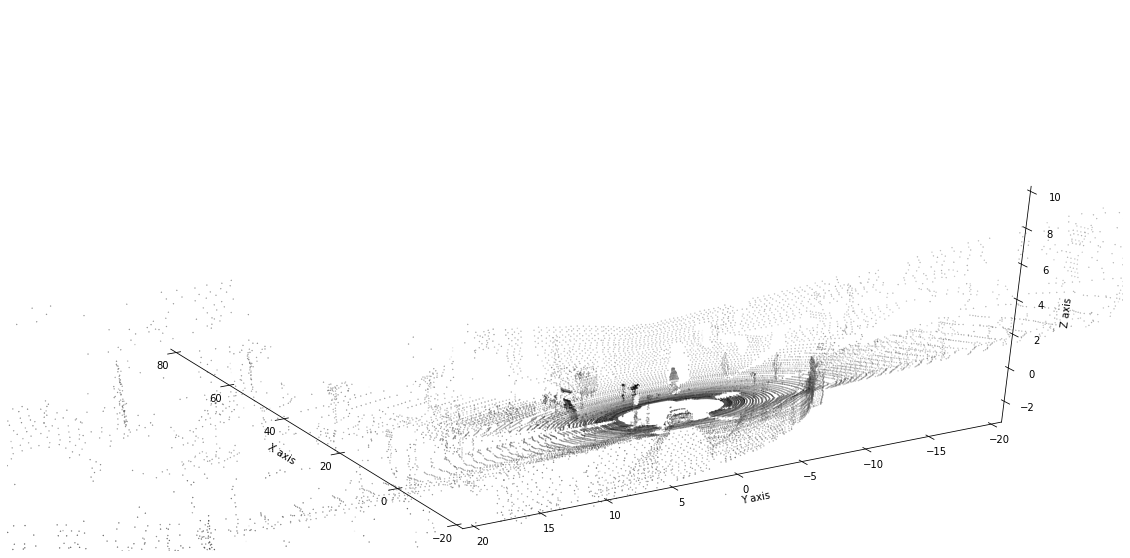

In [9]:
from mpl_toolkits.mplot3d import Axes3D



fig= plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(40,150)
draw_point_cloud(ax,points[::5])

In [10]:
points

array([[22.719,  0.031,  0.977,  0.32 ],
       [18.052,  0.076,  0.82 ,  0.46 ],
       [18.026,  0.132,  0.819,  0.24 ],
       ...,
       [ 3.777, -1.409, -1.764,  0.   ],
       [ 3.775, -1.394, -1.76 ,  0.   ],
       [ 5.634, -1.395, -2.59 ,  0.   ]], dtype=float32)

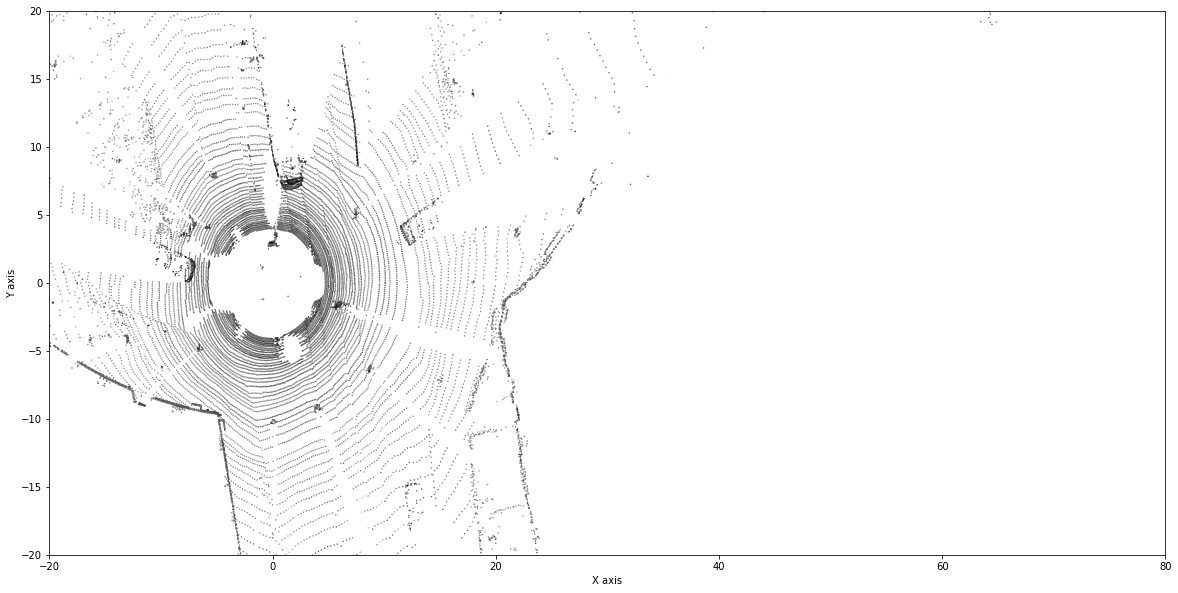

In [11]:
fig, ax=plt.subplots(figsize=(20,10))
draw_point_cloud(ax,points[::5], axes=[0,1])

In [12]:
df_tracking=read_tracking('/mnt/data/prog/Kitti/label_02/0000.txt')
df_tracking.head()

frame  track_id        type  truncated  occluded     alpha    bbox_left  \
2      0         0         Car          0         0 -1.793451   296.744956   
3      0         1     Cyclist          0         0 -1.936993   737.619499   
4      0         2  Pedestrian          0         0 -2.523309  1106.137292   
7      1         0         Car          0         0 -1.796862   294.898777   
8      1         1     Cyclist          0         0 -1.935205   745.017137   

     bbox_top   bbox_right  bbox_bottom    height     width    length  \
2  161.752147   455.226042   292.372804  2.000000  1.823255  4.433886   
3  161.531951   931.112229   374.000000  1.739063  0.824591  1.785241   
4  166.576807  1204.470628   323.876144  1.714062  0.767881  0.972283   
7  156.024256   452.199718   284.621269  2.000000  1.823255  4.433886   
8  156.393157   938.839722   374.000000  1.739063  0.824591  1.785241   

      pos_x     pos_y      pos_z     rot_y  
2 -4.552284  1.858523  13.410495 -2.115488  
3  1.640400  1.675660   5.776261 -1.675458  
4  6.301919  1.652419   8.455685 -1.900245  
7 -4.650955  1.766774  13.581085 -2.121565  
8  1.700640  1.640419   5.778596 -1.664456

In [13]:
def comput3d_box_cam2(h,w,l,x,y,z,yaw):
    R=np.array([[np.cos(yaw),0,np.sin(yaw)],[0,1,0],[-np.sin(yaw),0,np.cos(yaw)]])
    x_corners = [l/2, l/2, -l/2, -l/2, l/2, l/2, -l/2, -l/2]
    y_corners = [0, 0, 0, 0, -h, -h, -h, -h ]
    z_corners = [w/2, -w/2, -w/2, w/2, w/2, -w/2, -w/2, w/2 ]
    corners_3d_cam2=np.dot(R,np.vstack([x_corners,y_corners,z_corners]))
    corners_3d_cam2+=np.vstack([x,y,z])
    return corners_3d_cam2
    

In [14]:
def draw_box(ax,vertices,axes=[0,1,2],color='black'):
    vertices = vertices[axes,:]
    connections=[
        [0,1],[1,2],[2,3],[3,0],
        [4,5],[5,6],[6,7],[7,4],
        [0,4],[1,5],[2,6],[3,7]        
    ]
    for connection in connections:
        ax.plot(*vertices[:,connection],c=color,lw=0.5)
    
    
    

In [15]:
corners_3d_cam2=comput3d_box_cam2(*df_tracking.loc[2,['height','width','length','pos_x','pos_y','pos_z','rot_y']])

In [16]:
corners_3d_cam2

array([[-6.48070602, -4.92129955, -2.62386198, -4.18326845, -6.48070602,
        -4.92129955, -2.62386198, -4.18326845],
       [ 1.858523  ,  1.858523  ,  1.858523  ,  1.858523  , -0.141477  ,
        -0.141477  , -0.141477  , -0.141477  ],
       [14.83425393, 15.77898154, 11.98673607, 11.04200846, 14.83425393,
        15.77898154, 11.98673607, 11.04200846]])

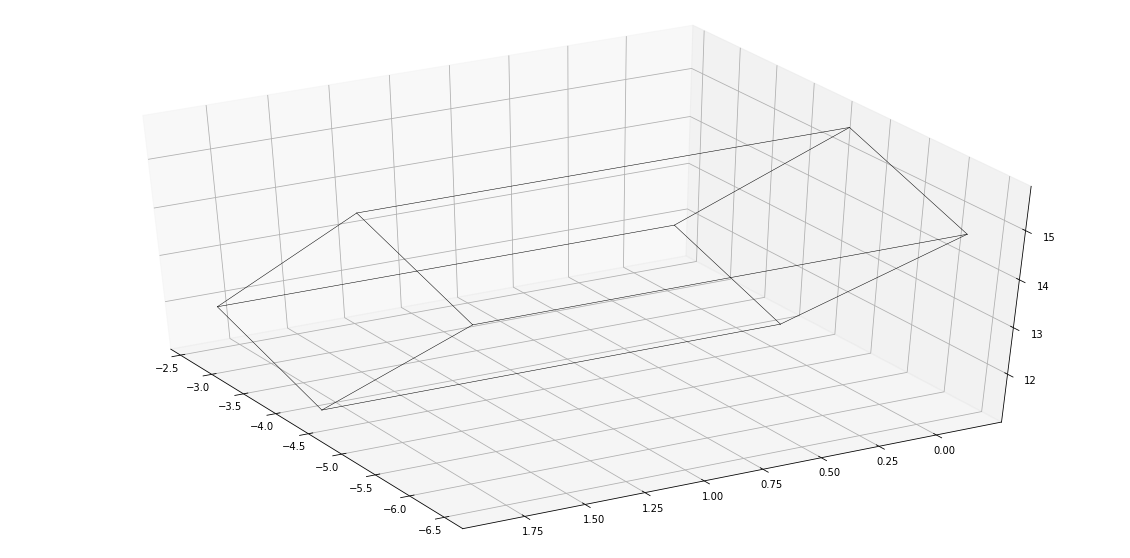

In [17]:
fig= plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(40,150)
draw_box(ax,(corners_3d_cam2))

In [18]:
from kitti_utils import *


In [19]:
calib=Calibration('/mnt/data/prog/Kitti/2011_09_26 /2011_09_26_drive_0005_sync/',from_video=True)
corners_3d_velo=calib.project_rect_to_velo(corners_3d_cam2.T).T
corners_3d_velo

array([[15.12424719, 16.06928938, 12.27779014, 11.33274795, 15.10334837,
        16.04839056, 12.25689133, 11.31184914],
       [ 6.49985556,  4.9406537 ,  2.64287284,  4.2020747 ,  6.47872485,
         4.91952299,  2.62174213,  4.18094399],
       [-1.70710774, -1.71370686, -1.7776097 , -1.77101058,  0.29267156,
         0.28607244,  0.2221696 ,  0.22876872]])

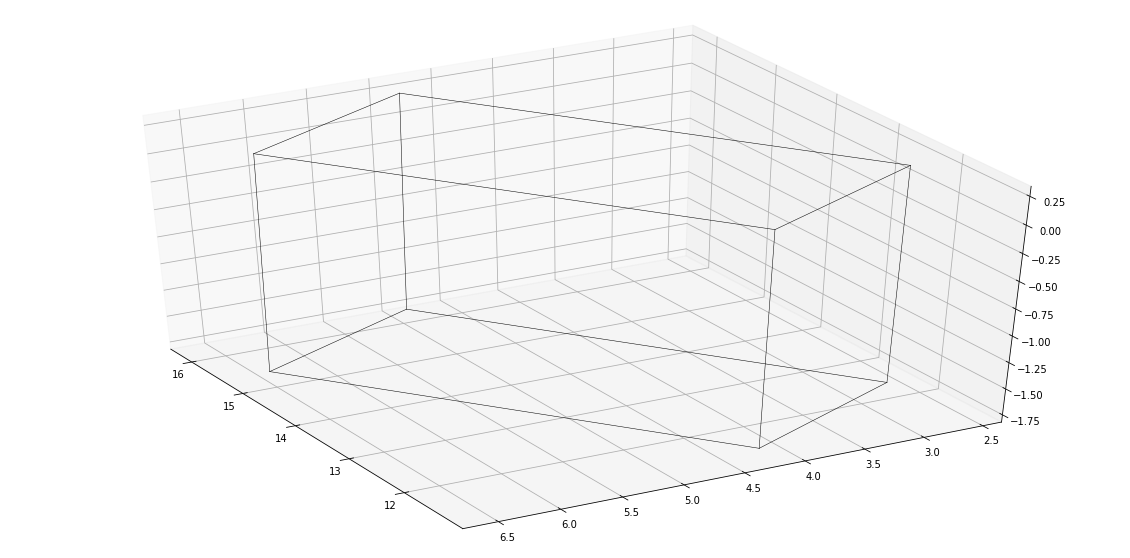

In [20]:
fig= plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(40,150)
draw_box(ax,(corners_3d_velo))

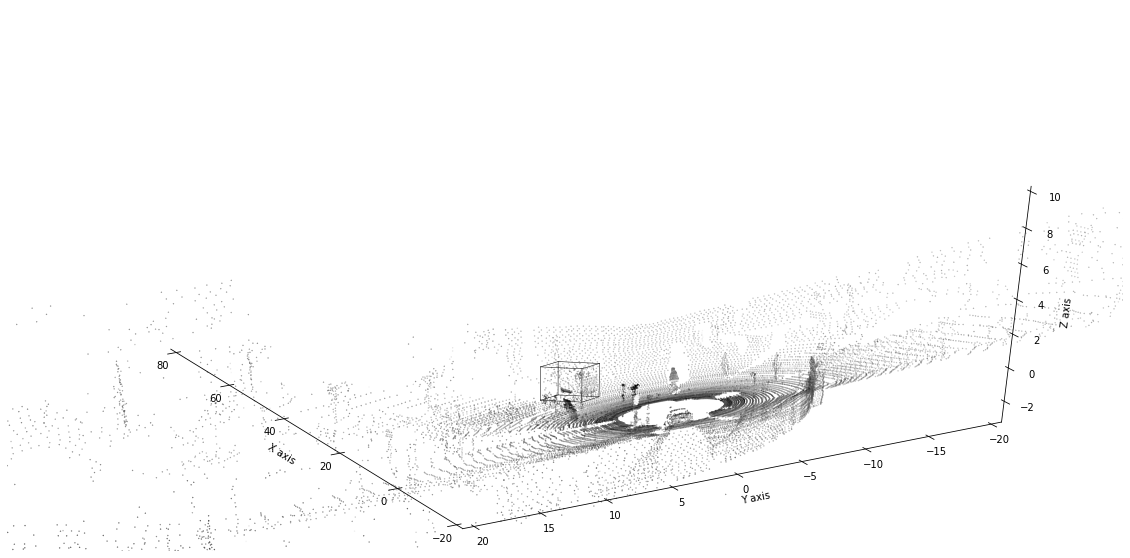

In [21]:
fig= plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(40,150)
draw_point_cloud(ax,points[::5])
draw_box(ax,(corners_3d_velo))

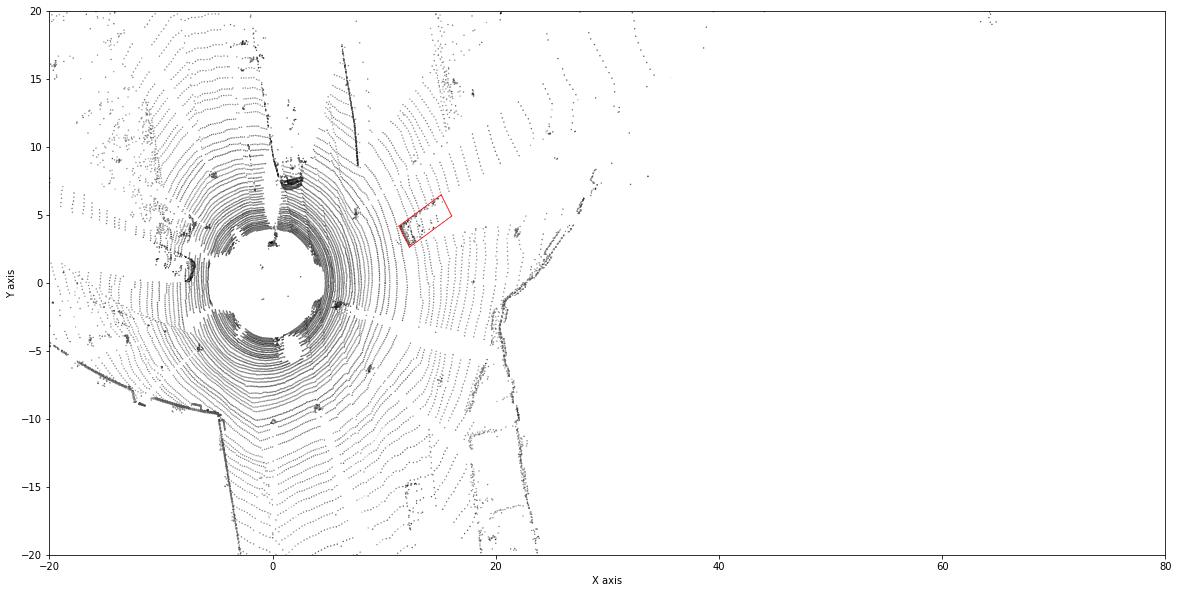

In [22]:
fig, ax=plt.subplots(figsize=(20,10))
draw_point_cloud(ax,points[::5], axes=[0,1])
draw_box(ax,(corners_3d_velo),axes=[0,1],color='red')

In [34]:
import pandas as pd
import numpy as np

IMU_COLUMN_NAMES=['lat','lon','alt','roll','pitch','yaw','vn','ve','vf','vl','vu','ax','ay','az','af','al','au','wx','wy','wz','wf','wl','wu','posacc','velacc','navstat','numsats','posmode','velmode','orimode'] 

def read_imu(path):
    df = pd.read_csv(path,header=None,sep=' ')
    df.columns=IMU_COLUMN_NAMES
    return df


def compute_great_circle_distance(lat1,lon1,lat2,lon2):
    delta_sigma=float(np.sin(lat1*np.pi/180)*np.sin(lat2*np.pi/180)+np.cos(lat1*np.pi/180)*np.cos(lat2*np.pi/180)*np.cos(lon1*np.pi/180-lon2*np.pi/180))
    return 6371000.0*np.arccos(delta_sigma)

In [43]:
pre_imu_data=None
gps_distance=[]
imu_distance=[]
for frame in range(154):
    imu_data=read_imu('/mnt/data/prog/Kitti/2011_09_26 /2011_09_26_drive_0005_sync/oxts/data/%010d.txt'%frame)
    if pre_imu_data is not None:
        gps_distance+=[compute_great_circle_distance(imu_data.lat,imu_data.lon,pre_imu_data.lat,pre_imu_data.lon)]
        imu_distance+=[0.1*np.linalg.norm(imu_data[['vf','vl']])]
        #0.1 LIFETIME
    pre_imu_data=imu_data  

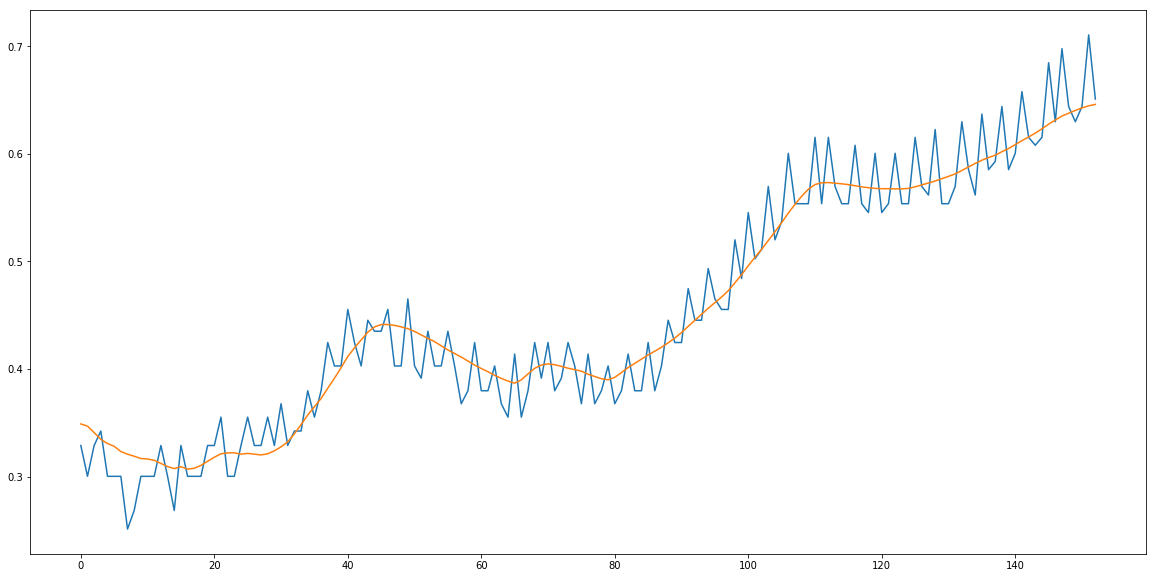

In [45]:
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(20,10))
plt.plot(gps_distance)
plt.plot(imu_distance)
plt.show()

In [47]:
pre_imu_data=None
locations=[]

for frame in range(154):
    imu_data=read_imu('/mnt/data/prog/Kitti/2011_09_26 /2011_09_26_drive_0005_sync/oxts/data/%010d.txt'%frame)
    if pre_imu_data is not None:
        displacement=0.1*np.linalg.norm(imu_data[['vf','vl']])
        yaw_change=float(imu_data.yaw-pre_imu_data.yaw)
        for i in range(len(locations)):
            x0,y0=locations[i]
            x1=x0*np.cos(yaw_change)+y0*np.sin(yaw_change)-displacement
            y1=-x0*np.sin(yaw_change)+y0*np.cos(yaw_change)
            locations[i]=np.array([x1,y1])
            
    locations+=[np.array([0,0])]
    pre_imu_data=imu_data

In [48]:
locations

[array([-58.64953128, -22.47156911]),
 array([-58.31085644, -22.38769258]),
 array([-57.97523228, -22.30012174]),
 array([-57.64651941, -22.2099704 ]),
 array([-57.32510736, -22.11697879]),
 array([-57.00863027, -22.02110483]),
 array([-56.69582033, -21.92204674]),
 array([-56.38901451, -21.82035513]),
 array([-56.08572808, -21.71591389]),
 array([-55.78542791, -21.60863807]),
 array([-55.4884522 , -21.49833886]),
 array([-55.19323797, -21.38467048]),
 array([-54.9004981, -21.2681763]),
 array([-54.61184595, -21.14915173]),
 array([-54.3273186 , -21.02786621]),
 array([-54.04596793, -20.90402385]),
 array([-53.7645035 , -20.77615661]),
 array([-53.48645592, -20.64623518]),
 array([-53.20918004, -20.51292638]),
 array([-52.93101076, -20.37518847]),
 array([-52.65135245, -20.2320791 ]),
 array([-52.37002987, -20.08392078]),
 array([-52.08787798, -19.93057201]),
 array([-51.80680675, -19.77344018]),
 array([-51.52755687, -19.61300645]),
 array([-51.25113989, -19.45013616]),
 array([-50.97